## 課題1.3

$s$:その場にどどまる確率  
$p,q$:左隣，右隣に移動する確率  
$s+p+q=1$  

In [19]:
using LinearAlgebra
using Plots
gr()


# Existence probability
S(s,p,q) = [s+p p 0 0 0 0  0
             q  s p 0 0 0  0
             0  q s p 0 0  0
             0  0 q s p 0  0 
             0  0 0 q s p  0
             0  0 0 0 q s  p
             0  0 0 0 0 q s+q]


# Temporal change plot
function temporalchange(g, f)
    
    # 0sec
    g2 = g
    
    # 1-60sec
    for t = 1:60
        g = f*g
        g2 = hcat(g2, g)
    end
    
    # plot
    plot(0:60, g2',
    w=2, marker=1,
    label=["0" "1" "2" "3" "4" "5" "6"],
    title = "Temporal Change",
    xlabel = "sec",
    ylabel = "Existence probability")
    
    # existence probability at 60sec
    return g2[:,61]
end

temporalchange (generic function with 1 method)

### 1.3.1

[0.143492, 0.143364, 0.143142, 0.142855, 0.142577, 0.142347, 0.142223]


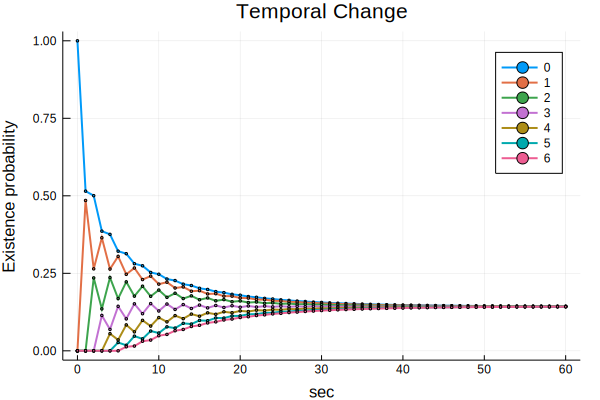

In [1]:
#main
function main()
    println(temporalchange([1 0 0 0 0 0 0]', S(0.03, 0.485, 0.485)))
    savefig("img/1_3_1.png")
    plot!()
end


main()

### 1.3.2

In [3]:
# main
function main()
    for i = 2:7
        g = Matrix{Float64}(I, 7, 7)[i,:]
        println(temporalchange(g, S(0.03, 0.485, 0.485)))
        title!("g(0) = $(g)")
        savefig("img/1_3_2-$(i).png")
    end
end


main()

[0.143364, 0.143269, 0.143077, 0.142864, 0.142625, 0.142453, 0.142347]
[0.143142, 0.143077, 0.142992, 0.142847, 0.14274, 0.142625, 0.142577]
[0.142855, 0.142864, 0.142847, 0.142868, 0.142847, 0.142864, 0.142855]
[0.142577, 0.142625, 0.14274, 0.142847, 0.142992, 0.143077, 0.143142]
[0.142347, 0.142453, 0.142625, 0.142864, 0.143077, 0.143269, 0.143364]
[0.142223, 0.142347, 0.142577, 0.142855, 0.143142, 0.143364, 0.143492]


### 1.3.3

## 行列を綺麗に表示する
```julia
Base.print_array(IOContext(stdout, :compact => true), A)
```

In [1]:
A=[0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857]
Base.print_array(IOContext(stdout, :compact => true), A)

 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857

In [15]:
# main
function main()
    Base.print_array(IOContext(stdout, :compact => true), S(0.03, 0.485, 0.485)^180)
    anim = @animate for t=1:180
        heatmap(0:6, 0:6, round.(S(0.03, 0.485, 0.485)^t; digits=6), yaxis=:flip, c=:blues, aspect_ratio=1)
    end
    gif(anim, "img/1_3_3.gif", fps = 30)
end


main()

 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857

┌ Info: Saved animation to 
│   fn = /Users/5ebec/computational-methods-and-exercise-in-eee/work1/img/1_3_3.gif
└ @ Plots /Users/5ebec/.julia/packages/Plots/cDXot/src/animation.jl:90


Plots.AnimatedGif("/Users/5ebec/computational-methods-and-exercise-in-eee/work1/img/1_3_3.gif")

In [13]:
for i = [1 30 60 90 120 180]
    heatmap(0:6, 0:6, round.(S(0.03, 0.485, 0.485)^i; digits=6), yaxis=:flip, c=:blues, aspect_ratio=1)
    savefig("img/1_3_3-$(i).png")
end

## 課題1.4
### 1.4.1
$s,p,q$を1.3.1以外の値に設定し，同様の計算を実施せよ．

変更した値が存在確率の時間変化に対し，どのような影響を与えるかについて述べよ．


In [17]:
# main
function main()
    # p = q
    anim_s = @animate for s = 0.0:0.01:1.0
        p = q = round((1-s)/2; digits=3)
        temporalchange([1 0 0 0 0 0 0]', S(s, p, q))
        title!("s=$(s), p=$(p), q=$(q)")
        if s == 0.0 || s == 0.3 || s == 0.6 || s == 0.9
            savefig("img/1_4_1-s_$(Int(s*10)).png")
        end
    end
    gif(anim_s, "img/1_4_1-s.gif", fps = 20)

    # s = 0.03
    s = 0.03
    anim_p = @animate for p = 0.0:0.01:(1.0-s)
        q = round(1-s-p; digits=2)
        temporalchange([1 0 0 0 0 0 0]', S(s, p, q))
        title!("s=$(s), p=$(p), q=$(q)")
        if p == 0.0 || p == 0.3 || p == 0.6 || p == 0.9
            savefig("img/1_4_1-p_$(Int(p*10)).png")
        end
    end
    gif(anim_p, "img/1_4_1-p.gif", fps = 20)
end


main()

┌ Info: Saved animation to 
│   fn = /Users/5ebec/computational-methods-and-exercise-in-eee/work1/img/1_4_1-s.gif
└ @ Plots /Users/5ebec/.julia/packages/Plots/cDXot/src/animation.jl:90
┌ Info: Saved animation to 
│   fn = /Users/5ebec/computational-methods-and-exercise-in-eee/work1/img/1_4_1-p.gif
└ @ Plots /Users/5ebec/.julia/packages/Plots/cDXot/src/animation.jl:90


Plots.AnimatedGif("/Users/5ebec/computational-methods-and-exercise-in-eee/work1/img/1_4_1-p.gif")

### 1.4.2
固有値を求める
```julia
using LinearAlgebra
eigen(A)
```

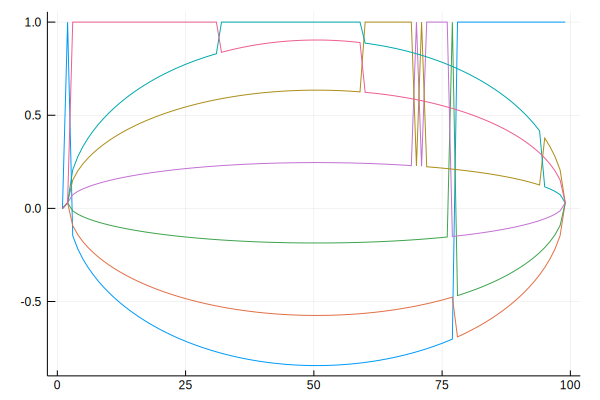

In [294]:
function main()
    eig = zeros(7)
    s = 0.03
    for p = 0.0:0.01:(1.0-s)
        q = round(1-s-p; digits=2)
        eig = hcat(eig, eigvals(S(s, p, q)))
    end
    plot(eig')
end

main()